## I. Data Import & Data Wrangling

In [2]:
# Importing pandas/numpy libraries for data manipulation and analysis 
import pandas as pd
import numpy as np
import re

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Loading the Data
df = pd.read_csv('mbti_1.csv')

#Inspecting the data set
print(df.shape)

df.head()

(8675, 2)


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
# Original Post
print(df.posts[0])

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

In [4]:
# Cleaning the posts column, removing stopwords, numerics, punctuation and URLs.

# Function 01
def lower_case(row):
    '''Lower Case the String'''
    lower = row.lower()
    return lower

df['posts'] = df.posts.apply(lower_case)

# Function 02
def no_url(row):
    '''Removes URL from a string'''
    url_pattern = r'http\S+'
    string = re.sub(url_pattern,'', row)
    return string

df['posts'] = df.posts.apply(no_url)

# Function 03
def no_numbers(row):
    '''Removes numerics from a string'''
    string = re.sub(r'[0-9]+','', row)
    return string

df['posts'] = df.posts.apply(no_numbers)

In [5]:
# Function 04
def no_mbti(row):
    '''Removes MBTIs from a string'''
    string = row
    # Introverted MBTIs
    string = string.replace('intp','')
    string = string.replace('intj','')
    string = string.replace('infp','')
    string = string.replace('infj','')
    string = string.replace('istp','')
    string = string.replace('istj','')
    string = string.replace('isfp','')
    string = string.replace('isfj','')
    # Extroverted MBTIs
    string = string.replace('entp','')
    string = string.replace('entj','')
    string = string.replace('enfp','')
    string = string.replace('enfj','')
    string = string.replace('estp','')
    string = string.replace('estj','')
    string = string.replace('esfp','')
    string = string.replace('esfj','')
    return string

df['posts'] = df.posts.apply(no_mbti)

# Function 05
def string_split(row):
    '''Removes the ||| symbol from a string '''
    string = str(row.split('|||'))
    return string

df['posts'] = df.posts.apply(string_split)

# Function 06
from nltk.tokenize import sent_tokenize, word_tokenize

def no_punctuation(row):
    '''Removes punctuation and tokenizes a string'''
    string = re.sub(r'[^\w\s]','', row)
    return word_tokenize(string)

df['posts'] = df.posts.apply(no_punctuation)

In [6]:
# Removal of stop words 
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

# additional stop words found in text
additional = ['im', 'dont', 'ive', 'thats', 'id', 'although', 
              'really', 'kinda', 'know', 'ye', 'youre', 'oh'] 

# Updating the stopwords list
stopWords.update(additional)

# Function 07 
def no_stopwords(row):
    '''Removes stopwords from a tokenized post'''
    wordsFiltered = []
    for word in row:
        if word not in stopWords:
            wordsFiltered.append(word)
    return wordsFiltered

df['posts'] = df.posts.apply(no_stopwords)
df['word_qty'] = df.posts.apply(len)
df.head()

,type,posts,word_qty
0,INFJ,"[moments, sportscenter, top, ten, plays, prank...",294
1,ENTP,"[finding, lack, posts, alarming, sex, boring, ...",537
2,INTP,"[good, one, _____, course, say, blessing, curs...",419
3,INTJ,"[dear, enjoyed, conversation, day, esoteric, g...",512
4,ENTJ,"[fired, another, silly, misconception, approac...",468


In [7]:
# Cleansed posts
print(df.posts[0])

['moments', 'sportscenter', 'top', 'ten', 'plays', 'pranks', 'lifechanging', 'experience', 'life', 'repeat', 'today', 'may', 'perc', 'experience', 'immerse', 'last', 'thing', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'times', 'times', 'growth', 'welcome', 'stuff', 'game', 'set', 'match', 'prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative', 'basically', 'come', 'three', 'items', 'youve', 'determined', 'type', 'whichever', 'types', 'want', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left', 'things', 'moderation', 'sims', 'indeed', 'video', 'game', 'good', 'one', 'note', 'good', 'one', 'somewhat', 'subjective', 'completely', 'promoti

## II. Data Visualization

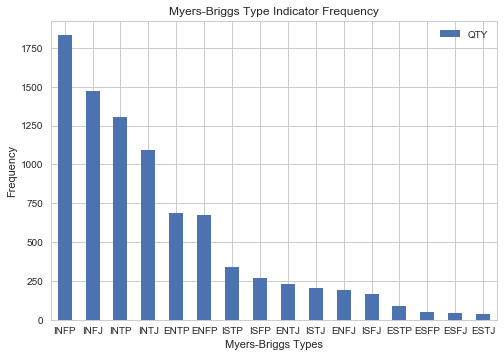

,INFP,INFJ,INTP,INTJ,ENTP,ENFP,ISTP,ISFP,ENTJ,ISTJ,ENFJ,ISFJ,ESTP,ESFP,ESFJ,ESTJ
QTY,1832,1470,1304,1091,685,675,337,271,231,205,190,166,89,48,42,39


In [8]:
# Counting the type frequencies
sns.set_style("whitegrid")

# Determining the quantity of MBTIs
mbti_qty = pd.DataFrame(df.type.value_counts())
mbti_qty.columns = ['QTY']

mbti_qty.plot(kind='bar')
plt.title('Myers-Briggs Type Indicator Frequency')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Myers-Briggs Types')
plt.show()

mbti_qty.transpose()

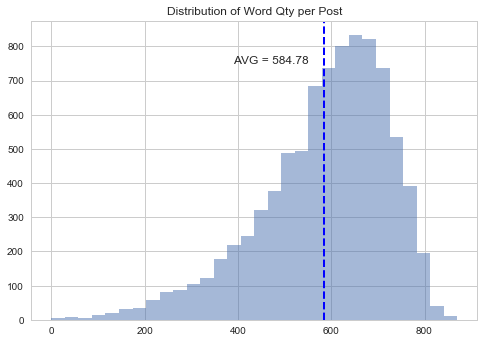

In [9]:
# Examining the distribution of posts
df.hist('word_qty', bins=30, alpha=0.5, histtype='barstacked')
plt.axvline(df.word_qty.mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Distribution of Word Qty per Post')
plt.text(390, 750,'AVG = %2.2f' %df.word_qty.mean())
plt.show()

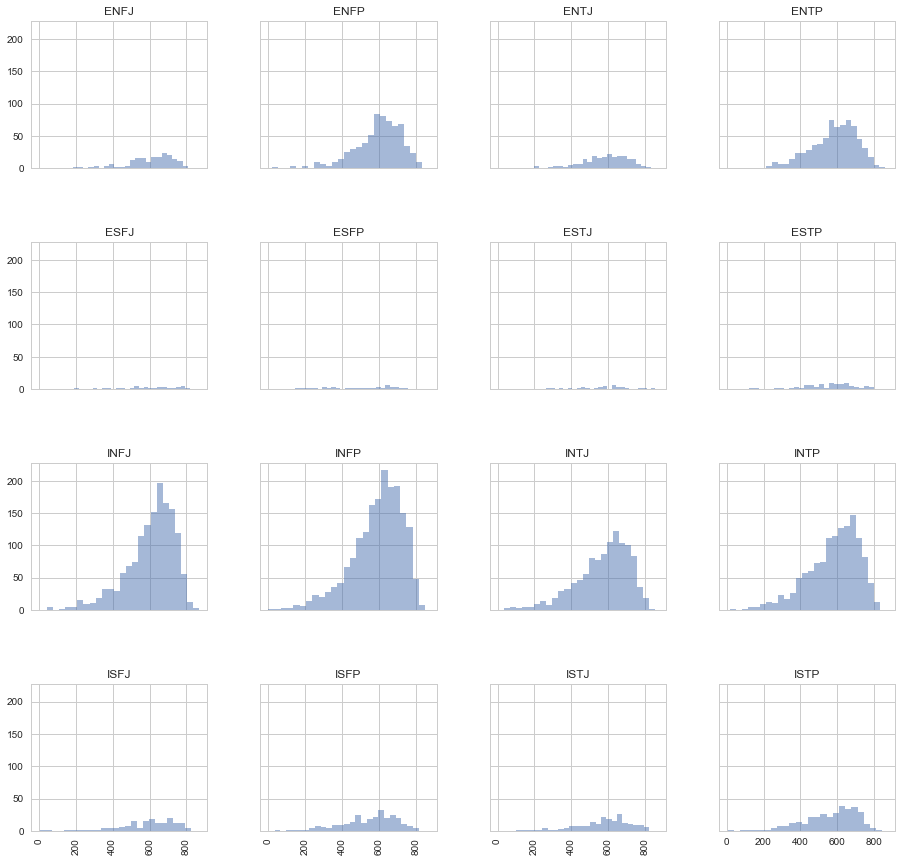

In [10]:
# Data Frame Histogram of Word Comment QTY by MBTI types
df.hist(column='word_qty', by = "type", grid=True, bins=25
        , xlabelsize=10, ylabelsize=10, figsize = (15,15), alpha=0.5, sharex=True, sharey=True)
plt.xticks(rotation=0)
plt.show()

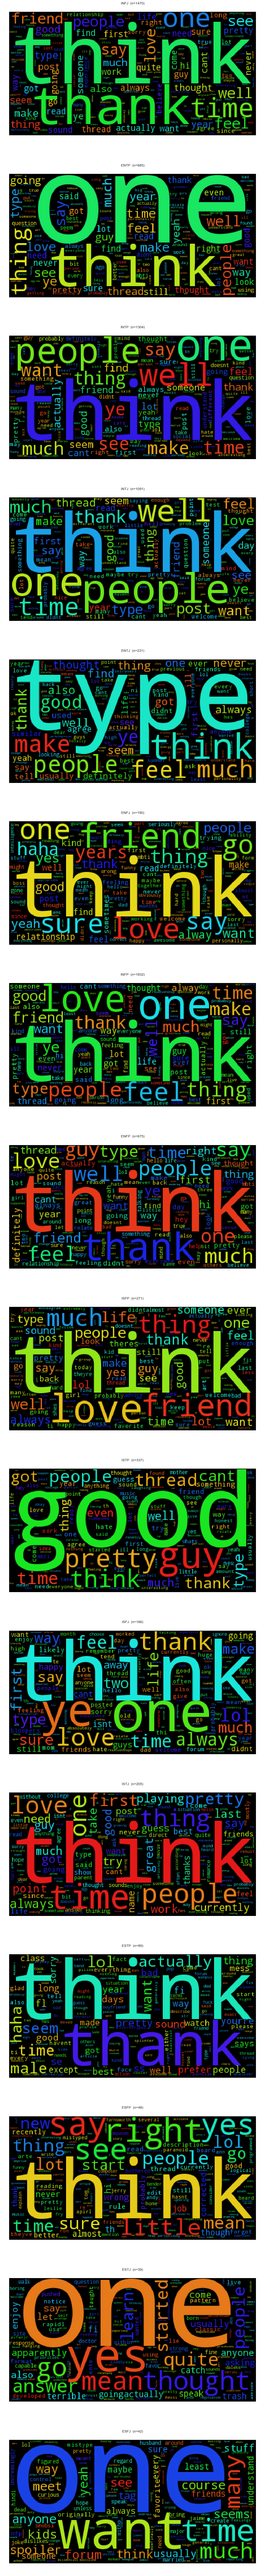

In [11]:
# Visualizing the words per MBTI in word clouds

from wordcloud import WordCloud

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    mbti = df[df['type'] == i]
    wordcloud = WordCloud().generate(mbti['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i + '  (n=' + str(len(mbti)) + ')')
    ax[k].axis("off")
    k+=1
    
plt.show()

## III. Machine Learning (multi-class)

In [12]:
# Convert posts to string

def back_to_string(row):
    string = str(row)
    string = re.sub(r'[^\w\s]','', string)
    return string

df['posts'] = df.posts.apply(back_to_string)
df.head()

,type,posts,word_qty
0,INFJ,moments sportscenter top ten plays pranks life...,294
1,ENTP,finding lack posts alarming sex boring positio...,537
2,INTP,good one _____ course say blessing curse absol...,419
3,INTJ,dear enjoyed conversation day esoteric gabbing...,512
4,ENTJ,fired another silly misconception approaching ...,468


In [13]:
df.word_qty.describe()

count    8675.000000
mean      584.782939
std       137.993167
min         0.000000
25%       508.000000
50%       609.000000
75%       686.000000
max       870.000000
Name: word_qty, dtype: float64

In [14]:
# Importing the necessary modules:  CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Creating a series to store the labels
y = df.type

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['posts'], y, test_size=0.10, random_state=53)

# Initializing a CountVectorizer object & transforming the training data and the test data
count_vectorizer = CountVectorizer(stop_words="english")

count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initializing the a TfidfVectorizer object & transforming the training data and the test data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [15]:
# Multinomial Naive Bayes
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Instantiating a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB(fit_prior=False)

# Fitting the classifier to the CountVectorizer training data & Predicting
nb_classifier.fit(count_train, y_train)
count_pred = nb_classifier.predict(count_test)

# CountVectorizer Accuracy Score Calculation
count_score = metrics.accuracy_score(y_test, count_pred)
print('CountVectorizer Accuracy Score: %2.2f'%(count_score * 100))
print()
print(classification_report(y_test, count_pred))

# TfidfVectorizer Accuracy Score Calculation
nb_classifier.fit(tfidf_train, y_train)
tfidf_pred = nb_classifier.predict(tfidf_test)

tfidf_score = metrics.accuracy_score(y_test, tfidf_pred)
print('Tfidf_Vectorizer Accuracy Score: %2.2f'%(tfidf_score * 100))
print()
print(classification_report(y_test, tfidf_pred))

CountVectorizer Accuracy Score: 33.64

             precision    recall  f1-score   support

       ENFJ       0.00      0.00      0.00        15
       ENFP       0.00      0.00      0.00        68
       ENTJ       0.00      0.00      0.00        25
       ENTP       0.00      0.00      0.00        62
       ESFJ       0.00      0.00      0.00         2
       ESFP       0.00      0.00      0.00         6
       ESTJ       0.00      0.00      0.00         4
       ESTP       0.00      0.00      0.00        12
       INFJ       0.44      0.36      0.40       176
       INFP       0.29      0.91      0.44       181
       INTJ       0.37      0.10      0.16        96
       INTP       0.41      0.42      0.42       127
       ISFJ       0.00      0.00      0.00        19
       ISFP       0.00      0.00      0.00        29
       ISTJ       0.00      0.00      0.00        22
       ISTP       0.00      0.00      0.00        24

avg / total       0.25      0.34      0.25       868

Tfid

/Users/JoseReyes/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## IV.  Reframing the problem as binary (Introvert vs Extrovert)

In [16]:
# Adding a new column to the data frame: introvert

def binary_mbti(row):
    '''Identifies a type as introvert'''
    if 'I' in row:
        value = 'Introvert'
    else:
        value = 'Extrovert'
    return value

df['attitude'] = df.type.apply(binary_mbti)

df.head()

,type,posts,word_qty,attitude
0,INFJ,moments sportscenter top ten plays pranks life...,294,Introvert
1,ENTP,finding lack posts alarming sex boring positio...,537,Extrovert
2,INTP,good one _____ course say blessing curse absol...,419,Introvert
3,INTJ,dear enjoyed conversation day esoteric gabbing...,512,Introvert
4,ENTJ,fired another silly misconception approaching ...,468,Extrovert


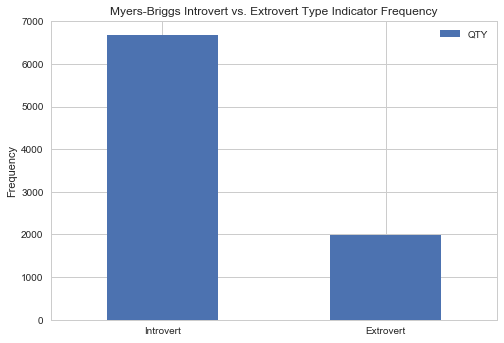

,Introvert,Extrovert
QTY,6676,1999


In [17]:
# Counting the introvert vs extrovert frequencies
sns.set_style("whitegrid")

# Determining the quantity of MBTIs
attitude_qty = pd.DataFrame(df.attitude.value_counts())
attitude_qty.columns = ['QTY']
#intro_qty.index = ['Introvert', 'Extrovert']

attitude_qty.plot(kind='bar')
plt.title('Myers-Briggs Introvert vs. Extrovert Type Indicator Frequency')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
#plt.xlabel('Myers-Briggs Introvert vs Extrovert Types')
plt.show()

attitude_qty.transpose()

In [55]:
df.word_qty.median()

609.0

In [57]:
introverts = df[df['attitude'] == 'Introvert']
extroverts = df[df['attitude'] == 'Extrovert']

print(introverts.word_qty.mean())
print(introverts.word_qty.median())
print(extroverts.word_qty.mean())
print(extroverts.word_qty.median())

584.986518873577
611.0
584.1030515257629
604.0


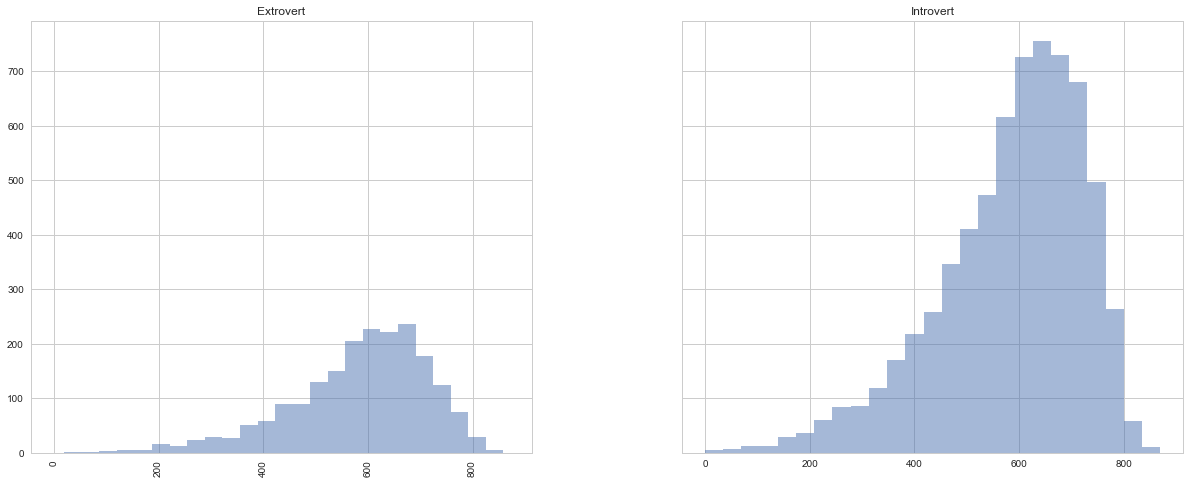

In [39]:
# Data Frame Histogram of Word Comment QTY by Introvert/Extrovert MBTI types
df.hist(column='word_qty', by = "attitude", grid=True, bins=25
        , xlabelsize=10, ylabelsize=10, figsize = (20,8), alpha=0.5, sharex=True, sharey=True)
plt.xticks(rotation=0)
plt.show()

In [ ]:
median_introvert = df[df['attitude'] == 'Introvert'].median()
print(median_introvert)

median_extrovert = df[df['attitude'] == 'Extrovert'].median()
print(median_extrovert)

mean_introvert = df[df['attitude'] == 'Introvert'].mean()
print(mean_introvert)

mean_extrovert = df[df['attitude'] == 'Extrovert'].mean()
print(mean_extrovert)


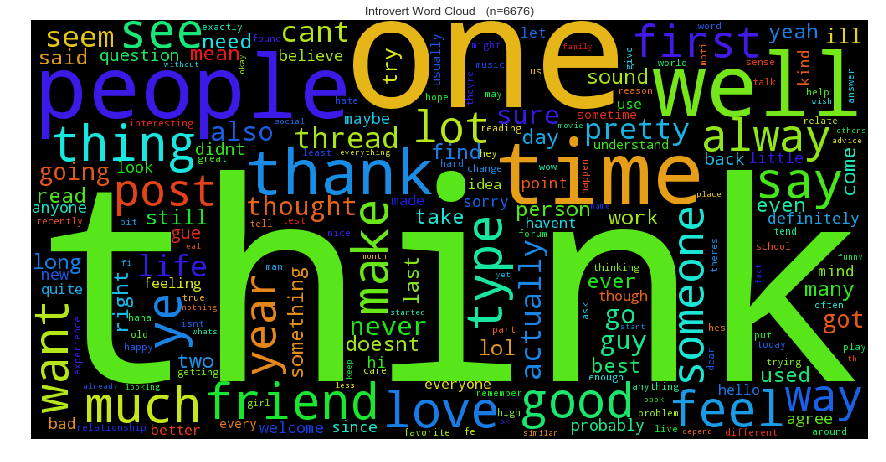

In [19]:
# Introvert Word Cloud
intro = df[df['attitude'] == 'Introvert']

intro_wordcloud = WordCloud(width = 1000, height = 500).generate(intro['posts'].to_string())
plt.figure(figsize=(15,8))
plt.title('Introvert Word Cloud ' + '  (n=' + str(len(intro)) + ')')
plt.imshow(intro_wordcloud)

plt.axis("off")
plt.show()



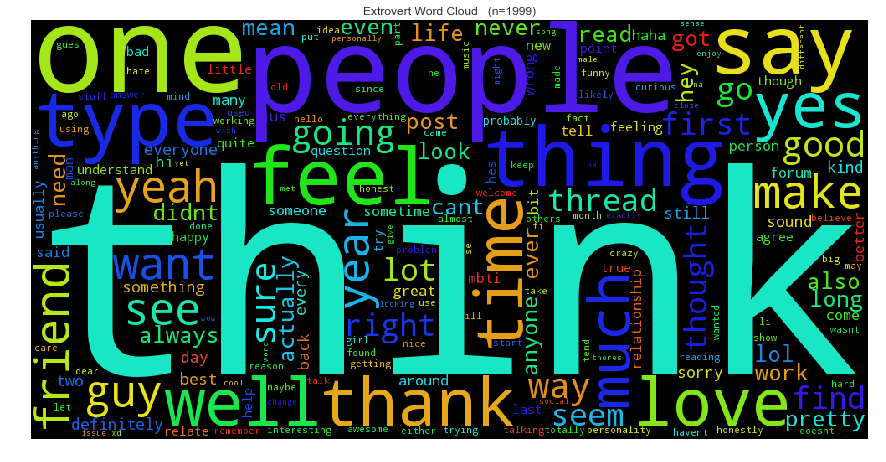

In [20]:
# Extrovert Word Cloud
extro = df[df['attitude'] == 'Extrovert']

extro_wordcloud = WordCloud(width = 1000, height = 500).generate(extro['posts'].to_string())
plt.figure(figsize=(15,8))
plt.title('Extrovert Word Cloud ' + '  (n=' + str(len(extro)) + ')')
plt.imshow(extro_wordcloud)

plt.axis("off")
plt.show()

## V. Machine Learning Revisited

In [21]:
# Importing the necessary modules:  CountVectorizer

# Creating a series to store the labels
y = df.attitude

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['posts'], y, test_size=0.10, random_state=53)

# Initializing a CountVectorizer object & transforming the training data and the test data
count_vectorizer = CountVectorizer(stop_words="english")

count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initializing the a TfidfVectorizer object & transforming the training data and the test data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
# Model 01:  Multinomial Naive Bayes

# Instantiating a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB(fit_prior=False)

# Fitting the classifier to the CountVectorizer training data & Predicting
nb_classifier.fit(count_train, y_train)
count_pred = nb_classifier.predict(count_test)

# CountVectorizer Accuracy Score Calculation
print("---Multinomial Naive Bayes Model---")
print()
count_score = metrics.accuracy_score(y_test, count_pred)
print('CountVectorizer Accuracy Score: %2.2f'%(count_score * 100))
print()
print(classification_report(y_test, count_pred))

# TfidfVectorizer Accuracy Score Calculation
nb_classifier.fit(tfidf_train, y_train)
tfidf_pred = nb_classifier.predict(tfidf_test)

tfidf_score = metrics.accuracy_score(y_test, tfidf_pred)
print('Tfidf_Vectorizer Accuracy Score: %2.2f'%(tfidf_score * 100))
print()
print(classification_report(y_test, tfidf_pred))

---Multinomial Naive Bayes Model---

CountVectorizer Accuracy Score: 77.76

             precision    recall  f1-score   support

  Extrovert       0.55      0.03      0.06       194
  Introvert       0.78      0.99      0.87       674

avg / total       0.73      0.78      0.69       868

Tfidf_Vectorizer Accuracy Score: 77.65

             precision    recall  f1-score   support

  Extrovert       0.00      0.00      0.00       194
  Introvert       0.78      1.00      0.87       674

avg / total       0.60      0.78      0.68       868



/Users/JoseReyes/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
# Model 02:  Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initiating the Logistic Regressor
lr_model = LogisticRegression()

# Fitting the data dou
lr_model.fit(count_train, y_train)

# Making the prediction
count_lr_pred = lr_model.predict(count_test)

# Determing the results
print("---Logistic Regression Model---")
print()
count_lr_score = metrics.accuracy_score(y_test, count_lr_pred)
print('CountVectorizer Accuracy Score: %2.2f'%(count_lr_score * 100))
print()
print(classification_report(y_test, count_pred))

# TfidfVectorizer Accuracy Score Calculation
lr_model.fit(tfidf_train, y_train)
tfidf_lr_pred = lr_model.predict(tfidf_test)

tfidf_lr_score = metrics.accuracy_score(y_test, tfidf_lr_pred)
print('Tfidf_Vectorizer Accuracy Score: %2.2f'%(tfidf_lr_score * 100))
print()
print(classification_report(y_test, tfidf_lr_pred))


---Logistic Regression Model---

CountVectorizer Accuracy Score: 77.19

             precision    recall  f1-score   support

  Extrovert       0.55      0.03      0.06       194
  Introvert       0.78      0.99      0.87       674

avg / total       0.73      0.78      0.69       868

Tfidf_Vectorizer Accuracy Score: 78.11

             precision    recall  f1-score   support

  Extrovert       0.62      0.05      0.10       194
  Introvert       0.78      0.99      0.88       674

avg / total       0.75      0.78      0.70       868



In [24]:
# Model 03:  Support Vector Machines

from sklearn import svm

svm_model = svm.SVC()

svm_model.fit(count_train, y_train)

count_svm_pred = svm_model.predict(count_test)

# Determing the results
print("---SVM Model---")
print()
count_svm_score = metrics.accuracy_score(y_test, count_svm_pred)
print('CountVectorizer Accuracy Score: %2.2f'%(count_svm_score * 100))
print()
print(classification_report(y_test, count_pred))

# TfidfVectorizer Accuracy Score Calculation
svm_model.fit(tfidf_train, y_train)
tfidf_svm_pred = svm_model.predict(tfidf_test)

tfidf_svm_score = metrics.accuracy_score(y_test, tfidf_svm_pred)
print('Tfidf_Vectorizer Accuracy Score: %2.2f'%(tfidf_svm_score * 100))
print()
print(classification_report(y_test, tfidf_svm_pred))

---SVM Model---

CountVectorizer Accuracy Score: 77.65

             precision    recall  f1-score   support

  Extrovert       0.55      0.03      0.06       194
  Introvert       0.78      0.99      0.87       674

avg / total       0.73      0.78      0.69       868

Tfidf_Vectorizer Accuracy Score: 77.65

             precision    recall  f1-score   support

  Extrovert       0.00      0.00      0.00       194
  Introvert       0.78      1.00      0.87       674

avg / total       0.60      0.78      0.68       868



/Users/JoseReyes/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# Model 04:  Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=53)

# CountVectorizer
tree.fit(count_train, y_train)

print("---Decision Tree Classifier---")
print('CountVectorizer Accuracy on training set: {:.2f}'.format(tree.score(count_train, y_train)*100))
print('CountVectorizer Accuracy on testing set: {:.2f}'.format(tree.score(count_test, y_test)*100))
print()
# Tfidf Vectorizer
tree.fit(tfidf_train, y_train)

print('Tfidf Accuracy on training set: {:.2f}'.format(tree.score(tfidf_train, y_train)*100))
print('Tfidf Accuracy on testing set: {:.2f}'.format(tree.score(tfidf_test, y_test)*100))

---Decision Tree Classifier---
CountVectorizer Accuracy on training set: 77.94
CountVectorizer Accuracy on testing set: 77.30

Tfidf Accuracy on training set: 78.19
Tfidf Accuracy on testing set: 76.38


In [32]:
# Model 05:  Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=2)

# CountVectorizer
forest.fit(count_train, y_train)

print("---Random Forest Classifier---")
print('CountVectorizer Accuracy on training set: {:.2f}'.format(forest.score(count_train, y_train)*100))
print('CountVectorizer Accuracy on testing set: {:.2f}'.format(forest.score(count_test, y_test)*100))
print()

# Tfidf Vectorizer
forest.fit(tfidf_train, y_train)

print('Tfidf Accuracy on training set: {:.2f}'.format(forest.score(tfidf_train, y_train)*100))
print('Tfidf Accuracy on testing set: {:.2f}'.format(forest.score(tfidf_test, y_test)*100))


---Random Forest Classifier---
CountVectorizer Accuracy on training set: 98.77
CountVectorizer Accuracy on testing set: 76.96

Tfidf Accuracy on training set: 98.89
Tfidf Accuracy on testing set: 76.04
